In [1]:
!pip install seaborn
import pandas as pd
from matplotlib import pyplot as plt
# display plot right under the code cell producing it
%matplotlib inline
import seaborn as sns
from scipy import stats
import numpy as np
import math
from sklearn.preprocessing import FunctionTransformer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
file = 'real_estate_data_eng.csv'
estate_df = pd.read_csv(file, sep='\t')
estate_df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,Shushary village,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Saint Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
estate_df.sample(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9781,19,7000000.0,79.5,2017-09-12T00:00:00,3,NaN,25.0,43.3,23,NaN,...,12.5,2.0,Pargolovo village,52611.0,18783.0,0.0,NaN,0.0,NaN,173.0
8151,10,8300000.0,74.0,2018-04-12T00:00:00,2,2.7,9.0,44.0,9,NaN,...,13.3,NaN,Saint Peterburg,42482.0,14185.0,0.0,NaN,1.0,963.0,156.0


In [4]:
estate_df.describe(include=['float']).T

,count,mean,std,min,25%,50%,75%,max
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0
airports_nearest,18157.0,2.879367e+04,1.263088e+04,0.0,18585.00,26726.00,37273.0,84869.0
cityCenters_nearest,18180.0,1.419128e+04,8.608386e+03,181.0,9238.00,13098.50,16293.0,65968.0
parks_around3000,18181.0,6.114075e-01,8.020736e-01,0.0,0.00,0.00,1.0,3.0


In [5]:
estate_df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
estate_df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [8]:
estate_df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [9]:
df_nulls = pd.concat([estate_df.dtypes, estate_df.isna().sum(), estate_df.isna().sum()/len(estate_df) * 100], axis=1)


In [10]:
df_nulls

,0,1,2
total_images,int64,0,0.000000
last_price,float64,0,0.000000
total_area,float64,0,0.000000
first_day_exposition,object,0,0.000000
rooms,int64,0,0.000000
ceiling_height,float64,9195,38.799105
floors_total,float64,86,0.362885
living_area,float64,1903,8.029875
floor,int64,0,0.000000
is_apartment,object,20924,88.290645


In [11]:
# low missingness -> below 10%
# medium missingness -> 10% - 30%
# high missingness -> >40%
df_nulls.columns = ['dtype', 'count', 'missing_ratio']
df_nulls = df_nulls[df_nulls['count'] > 0]
# sort dataframe by missing_ration (higher to lower)
df_nulls.sort_values(by='missing_ratio', ascending=False)

,dtype,count,missing_ratio
is_apartment,object,20924,88.290645
parks_nearest,float64,15620,65.909954
ponds_nearest,float64,14589,61.559559
balcony,float64,11519,48.605426
ceiling_height,float64,9195,38.799105
airports_nearest,float64,5542,23.384953
cityCenters_nearest,float64,5519,23.287902
ponds_around3000,float64,5518,23.283683
parks_around3000,float64,5518,23.283683
days_exposition,float64,3181,13.422507


In [13]:
estate_df.isnull().sum().sum()

np.int64(101441)

In [14]:
df_nulls.shape # 14 features that have nulls & 3 columns (dtype, count, missing_ratio)

(14, 3)

Text(0.5, 1.0, 'last_price distribution plot')

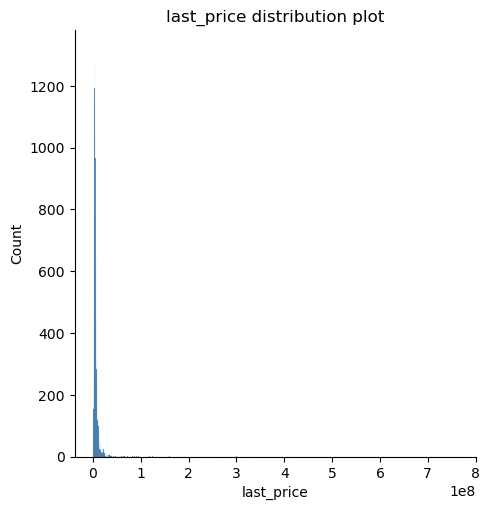

In [15]:
sns.displot(estate_df['last_price']) # x axis - bin ranges (price intervals)
plt.title('last_price distribution plot')
plt.show()

<Axes: ylabel='last_price'>

Text(0.5, 1.0, 'last_price boxplot')

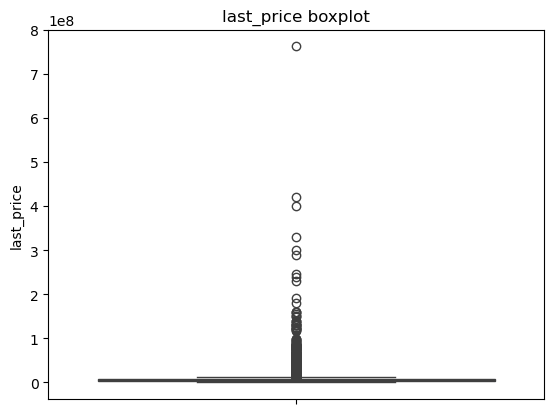

In [16]:
sns.boxplot(estate_df['last_price'])
plt.title('last_price boxplot')
plt.show()

In [17]:
# as we see we have outliers (or scale should be non-linear since most values are not visible due to outliers)
# find the outliers:
estate_df['last_price'].describe() # obvious outlier is 7.6, so lets consider values before 6.8

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

won't mind outliers and focus on price below 6.800000e+06

<Axes: ylabel='last_price'>

Text(0.5, 1.0, 'last_price < 6.800000e+06 boxplot')

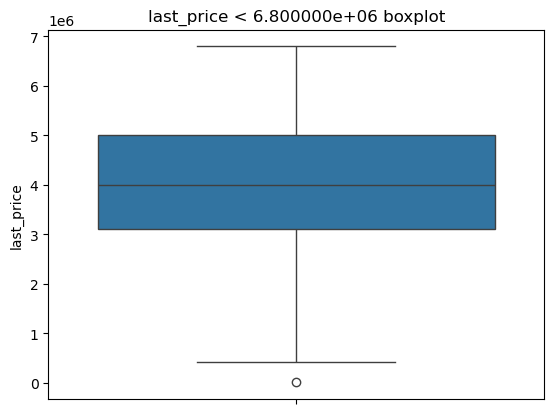

In [18]:
sns.boxplot(estate_df[estate_df['last_price'] < 6.800000e+06]['last_price'])
plt.title('last_price < 6.800000e+06 boxplot')
plt.show()

In [19]:
# check skewness & kurtosis to understand the outliers
f"Skewness: {estate_df['last_price'].skew()}"
f"Kurtosis: {estate_df['last_price'].kurt()}"

'Skewness: 25.804275189754364'

'Kurtosis: 1277.6825842313242'

last price is extremeley right skewed and has severe outliers

In [20]:
def describe_full(df):
    data_describe = df.describe().T
    df_numeric = df._get_numeric_data() # this df contains original values, while describe returns statistics
    dtype_df = df_numeric.dtypes
    data_describe['dtypes'] = dtype_df
    data_null = df_numeric.isna().sum() / len(df) * 100 # get the percentage of missing values
    data_describe['Missing %'] = data_null
    Cardinality = df_numeric.apply(pd.Series.nunique)
    data_describe['Cardinality'] = Cardinality
    df_skew = df_numeric.skew(axis=0, skipna=True)
    data_describe['Skew'] = df_skew
    # data_describe[data_describe['Missing %'] > 0.0]
    return data_describe
describe_full(estate_df)
    

,count,mean,std,min,25%,50%,75%,max,dtypes,Missing %,Cardinality,Skew
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0,int64,0.000000,38,0.258593
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0,float64,0.000000,2978,25.804275
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0,float64,0.000000,2182,4.768597
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0,int64,0.000000,17,1.524982
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0,float64,38.799105,183,41.709077
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0,float64,0.362885,36,0.940275
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7,float64,8.029875,1782,3.909430
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0,int64,0.000000,33,1.553141
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0,float64,9.612220,971,4.209632
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0,float64,48.605426,6,1.243099


<Axes: >

Text(0.5, 1.0, 'total_images histogram')

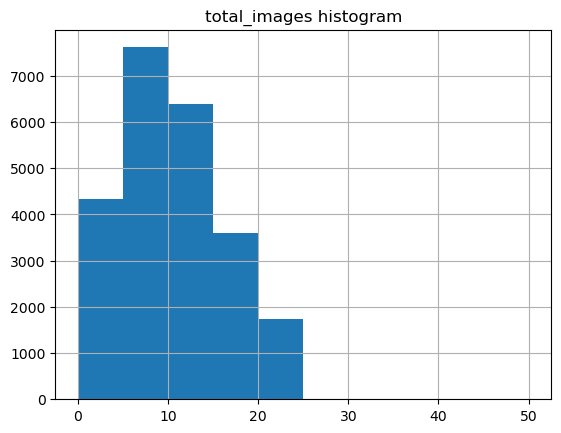

In [21]:
estate_df['total_images'].hist()
plt.title('total_images histogram')
plt.show() # most high priced apartments have 5-15 images. as nuber of images grow, the price goes down. Probbaly, photo quality matters

In [22]:
for col in list(set(estate_df.columns) - set(['last_price'])):
    estate_df[[col, "last_price"]].corr(numeric_only=True)

,kitchen_area,last_price
kitchen_area,1.000000,0.519869
last_price,0.519869,1.000000


,ceiling_height,last_price
ceiling_height,1.00000,0.08543
last_price,0.08543,1.00000


,days_exposition,last_price
days_exposition,1.000000,0.081146
last_price,0.081146,1.000000


,cityCenters_nearest,last_price
cityCenters_nearest,1.000000,-0.206747
last_price,-0.206747,1.000000


,open_plan,last_price
open_plan,1.000000,-0.008802
last_price,-0.008802,1.000000


,balcony,last_price
balcony,1.000000,0.029646
last_price,0.029646,1.000000


,total_area,last_price
total_area,1.000000,0.653675
last_price,0.653675,1.000000


,ponds_nearest,last_price
ponds_nearest,1.000000,-0.084809
last_price,-0.084809,1.000000


,airports_nearest,last_price
airports_nearest,1.000000,-0.026239
last_price,-0.026239,1.000000


,parks_around3000,last_price
parks_around3000,1.000000,0.151058
last_price,0.151058,1.000000


,floor,last_price
floor,1.000000,0.026576
last_price,0.026576,1.000000


,floors_total,last_price
floors_total,1.000000,-0.006984
last_price,-0.006984,1.000000


,last_price
last_price,1.0


,last_price
last_price,1.0


,last_price
last_price,1.0


,ponds_around3000,last_price
ponds_around3000,1.000000,0.159996
last_price,0.159996,1.000000


,rooms,last_price
rooms,1.000000,0.363343
last_price,0.363343,1.000000


,studio,last_price
studio,1.000000,-0.025362
last_price,-0.025362,1.000000


,parks_nearest,last_price
parks_nearest,1.000000,-0.016414
last_price,-0.016414,1.000000


,total_images,last_price
total_images,1.000000,0.104473
last_price,0.104473,1.000000


,living_area,last_price
living_area,1.000000,0.566492
last_price,0.566492,1.000000


<Figure size 1500x1500 with 0 Axes>

<Axes: >

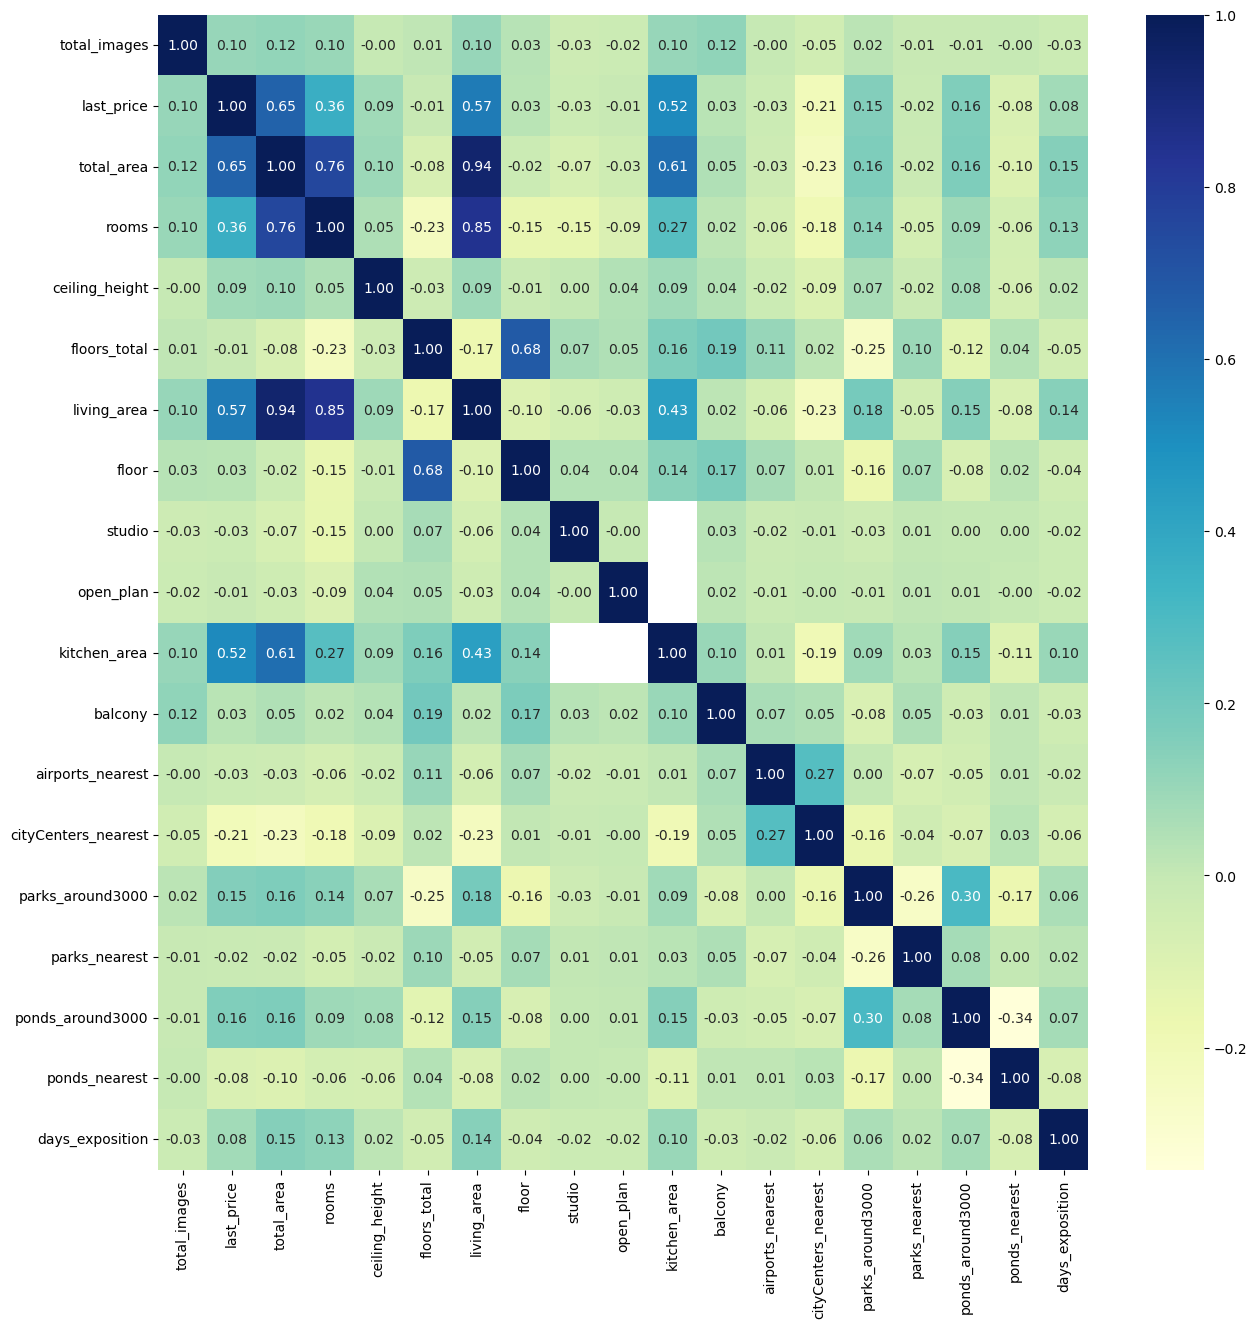

In [23]:
plt.figure(figsize=(15, 15))
corr_matrix = estate_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt=".2f")
plt.show()

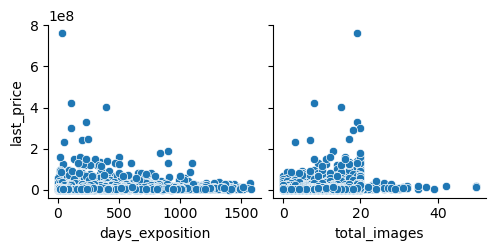

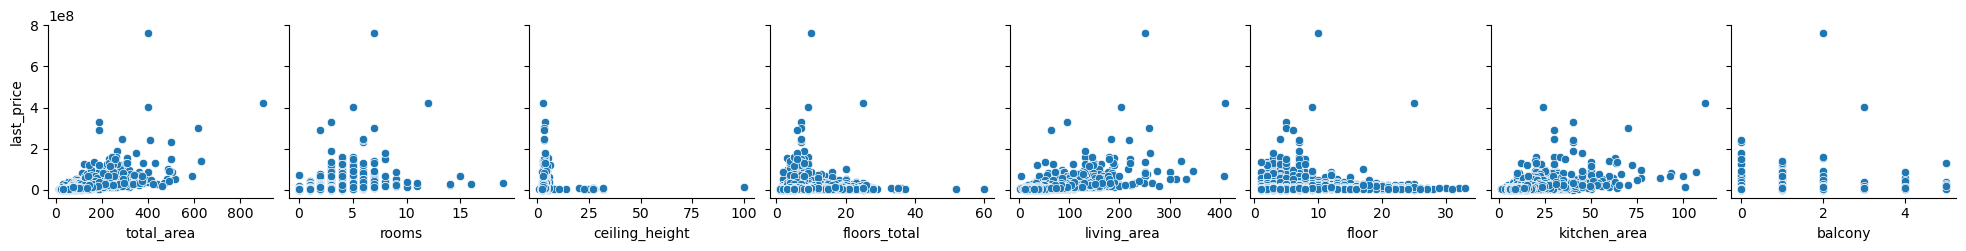

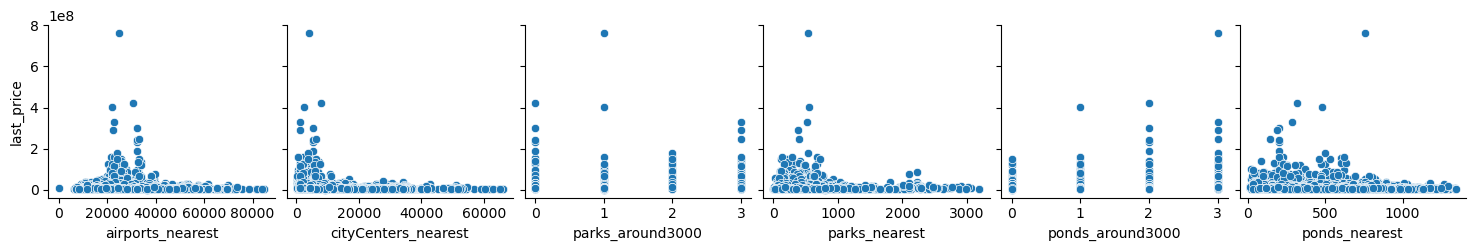

In [24]:
# gouped by:
# behavioral
sns.pairplot(data=estate_df, y_vars=['last_price'], x_vars=['days_exposition', 'total_images'])
# directly related to apartment
sns.pairplot(data=estate_df, y_vars=['last_price'], x_vars=[
    'total_area', 'rooms', 'ceiling_height', 'floors_total',
    'living_area', 'floor', 'kitchen_area', 'balcony'])
# related to environment
sns.pairplot(data=estate_df, y_vars='last_price', x_vars=[
    'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
    'parks_nearest', 'ponds_around3000', 'ponds_nearest'])
plt.show()

In [25]:
estate_df['log_floor'] = np.log1p(estate_df['floor'])

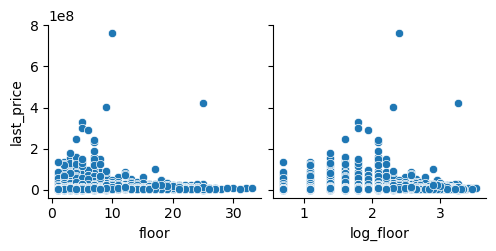

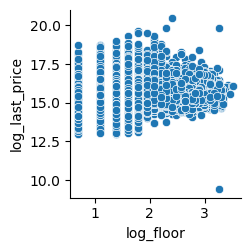

In [26]:
sns.pairplot(data=estate_df, y_vars='last_price', x_vars=['floor', 'log_floor'])
plt.show()
estate_df['log_last_price'] = np.log1p(estate_df['last_price'])
sns.pairplot(data=estate_df, y_vars='log_last_price', x_vars='log_floor')
plt.show()

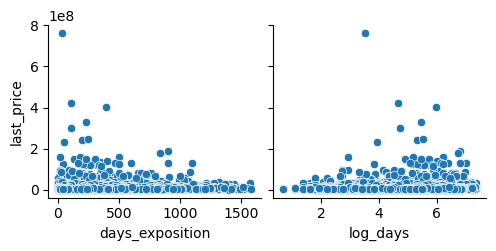

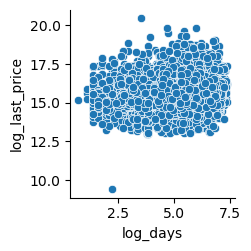

In [27]:
estate_df['log_days'] = np.log1p(estate_df['days_exposition'])
sns.pairplot(data=estate_df, y_vars='last_price', x_vars=['days_exposition', 'log_days'])
plt.show()
estate_df['log_last_price'] = np.log1p(estate_df['last_price'])
sns.pairplot(data=estate_df, y_vars='log_last_price', x_vars='log_days')
plt.show()

<Axes: xlabel='log_days', ylabel='log_last_price'>

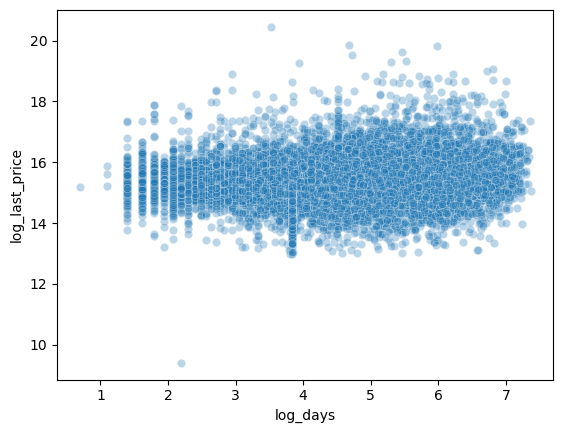

In [28]:
sns.scatterplot(
    x='log_days',
    y='log_last_price',
    data=estate_df,
    alpha=0.3
)
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


<Axes: ylabel='Density'>

Text(0.5, 1.0, 'kde')

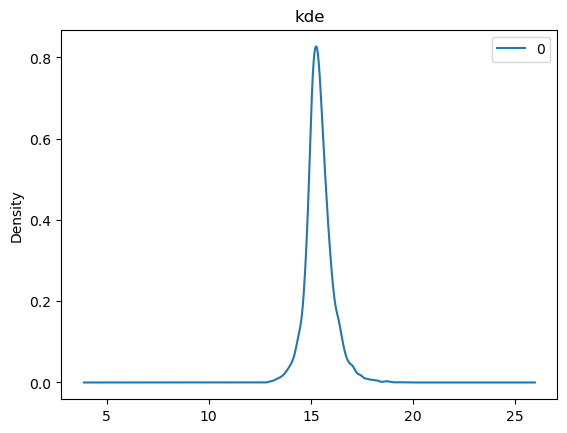

In [29]:
transformer = FunctionTransformer(np.log1p, validate=True)
pd.DataFrame(transformer.transform(estate_df[['last_price']])).plot(kind='kde')
plt.title('kde')
plt.show()

In [30]:
estate_df['log_last_price'] = transformer.transform(estate_df[['last_price']])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [31]:
def display_group_density_plot(df, groupby, on, palette, figsize):
    if not isinstance(df, pd.core.frame.DataFrame):
        raise ValueError('df must be a pandas DataFrame')
    if not groupby:
        raise ValueError('groupby parameter must be provided')
    elif groupby not in df.columns:
        raise ValueError(f'{groupby} does not exist in {df}. Available options: {', '.join(df.columns)}')
    if not on:
        raise ValueError('on parameter must be provided')
    elif on not in df.columns:
        raise ValueError(f'{on} does not exist in {df}. Available options: {', '.join(df.columns)}')
    if len(set(df[groupby])) > 10:
        groups = df[groupby].value_counts().index[:10]
    else:
        groups = set(df[groupby])

    # Get relevant palette
    if palette:
        palette = palette[:len(groups)]
    else:
        palette = sns.colot_palette()[:len(groups)]

    # Plot
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

    for value, color in zip(groups, palette):
        sns.kdeplot(df.loc[df[groupby] == value][on],
                          shade=True, color=color, label=value)
    ax.set_title(str(f'Distribution of {on} per {groupby} group'), fontsize=30)
    ax.set_xlabel(on, fontsize=20)
    return ax

/var/folders/r9/8dr59yx54zj9htqls0vy1_rh0000gn/T/ipykernel_3687/2705382867.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
/var/folders/r9/8dr59yx54zj9htqls0vy1_rh0000gn/T/ipykernel_3687/2705382867.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df[groupby] == value][on],
/var/folders/r9/8dr59yx54zj9htqls0vy1_rh0000gn/T/ipykernel_3687/2705382867.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df[groupby] == value][on],
/var/folders/r9/8dr59yx54zj9htqls0vy1_rh0000gn/T/ipykernel_3687/2705382867.py:29: FutureWarning: 

`shade` is now deprec

<Axes: title={'center': 'Distribution of log_last_price per total_area group'}, xlabel='log_last_price', ylabel='Density'>

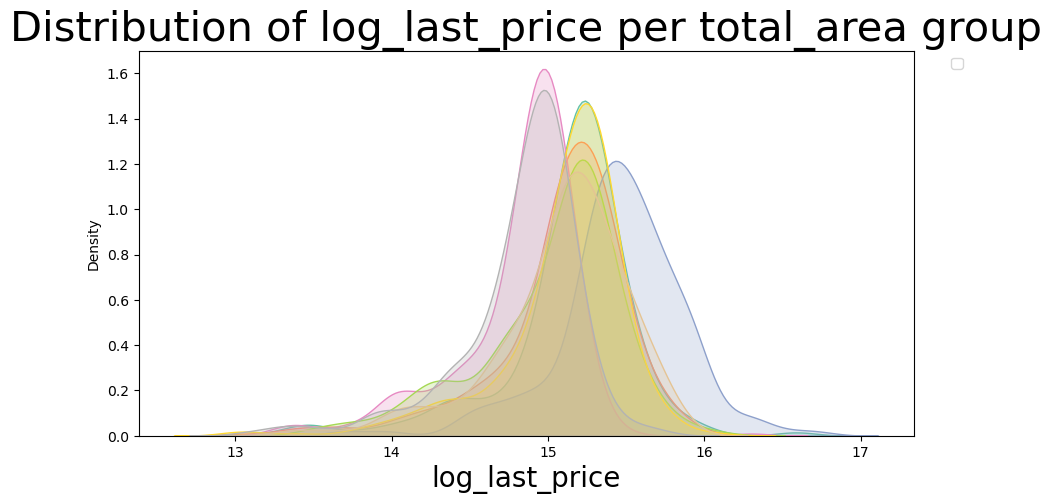

In [32]:
display_group_density_plot(
    estate_df, groupby='total_area', on='log_last_price',
    palette=sns.color_palette('Set2'), figsize=(10, 5))
plt.show()

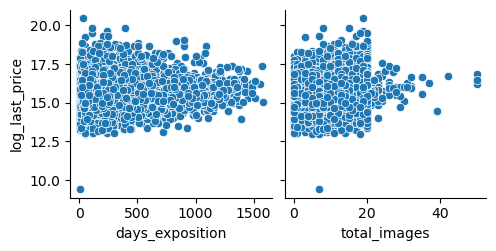

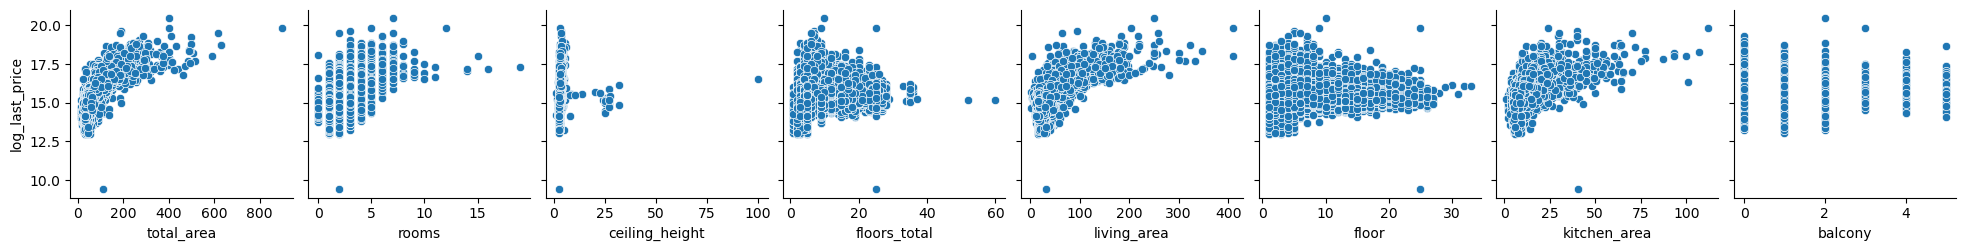

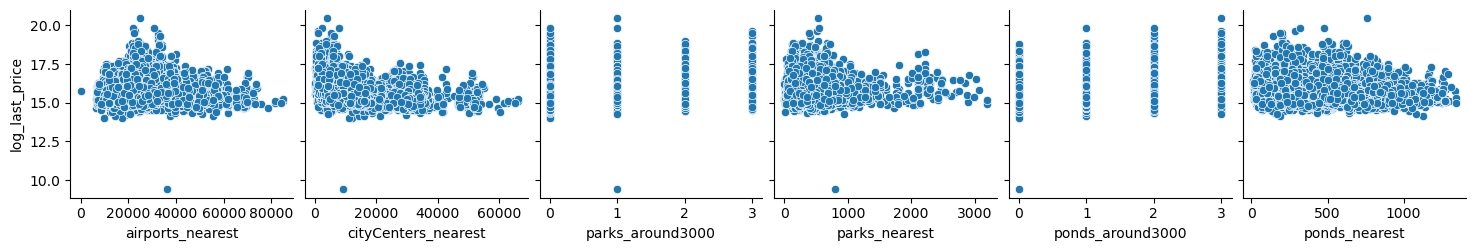

In [33]:
# gouped by:
# behavioral
sns.pairplot(data=estate_df, y_vars=['log_last_price'], x_vars=['days_exposition', 'total_images'])
# directly related to apartment
sns.pairplot(data=estate_df, y_vars=['log_last_price'], x_vars=[
    'total_area', 'rooms', 'ceiling_height', 'floors_total',
    'living_area', 'floor', 'kitchen_area', 'balcony'])
# related to environment
sns.pairplot(data=estate_df, y_vars='log_last_price', x_vars=[
    'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
    'parks_nearest', 'ponds_around3000', 'ponds_nearest'])
plt.show()

Conclusion:
is_apartment:
    the distance to the nearest airport in meters (m.).
    88% of missing data
    boolean
    candidate for deletion
    
parks_nearest:
    the distance to the nearest park in meters (m.).
    66% of missing data
    numerical

...

I want to drop features where missing ratio > 60

In [41]:
med_estate_df = estate_df.drop(['is_apartment', 'parks_nearest', 'ponds_nearest'], axis=1)

<Axes: >

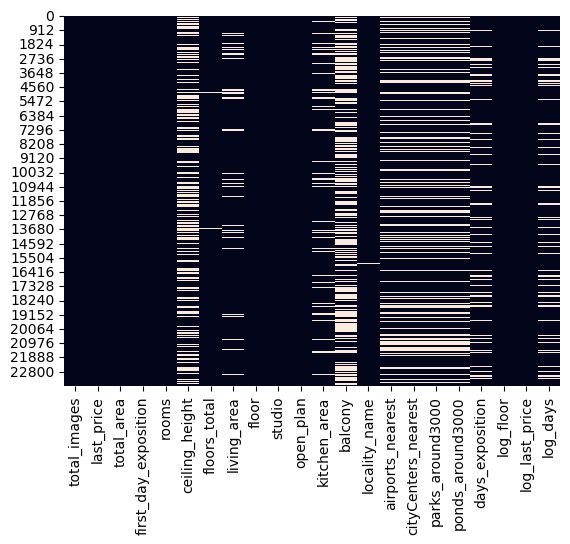

In [43]:
sns.heatmap(med_estate_df.isna(), cbar=False)
plt.show()

In [44]:
med_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   studio                23699 non-null  bool   
 10  open_plan             23699 non-null  bool   
 11  kitchen_area          21421 non-null  float64
 12  balcony               12180 non-null  float64
 13  locality_name         23650 non-null  object 
 14  airports_nearest      18157 non-null  float64
 15  cityCenters_nearest

In [45]:
med_estate_df['locality_name'].describe()

count               23650
unique                341
top       Saint Peterburg
freq                15721
Name: locality_name, dtype: object

In [ ]:
# fill loality name with mod - top is St. Peterburg
med_estate_df['locality_name'] = med_estate_df['locality_name'].fillna('Saint Peterburg')

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<Axes: ylabel='ceiling_height'>

Text(0.5, 1.0, 'ceiling_height boxplot')

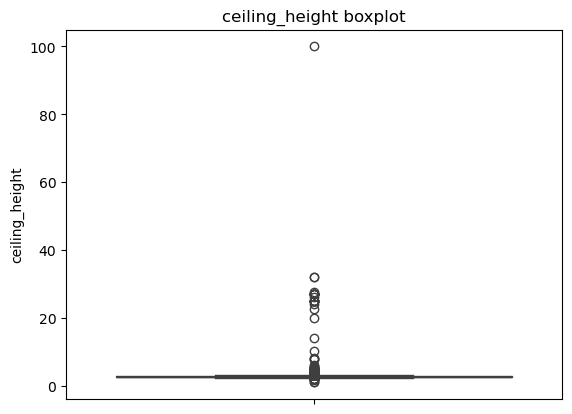

In [47]:
med_estate_df['ceiling_height'].describe()
sns.boxplot(med_estate_df['ceiling_height'])
plt.title('ceiling_height boxplot')
plt.show()

In [48]:
# fill ceiling height with mod - top is St. Peterburg
med_estate_df['ceiling_height'] = med_estate_df['ceiling_height'].fillna(2.650000)


<Axes: >

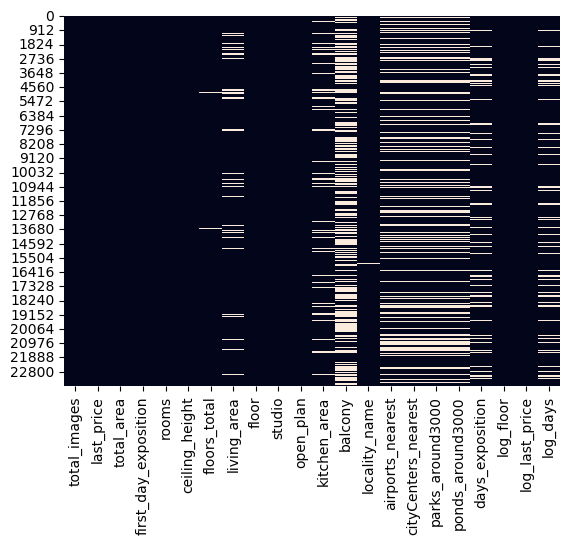

In [49]:
sns.heatmap(med_estate_df.isna(), cbar=False)
plt.show()

In [52]:
med_estate_df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [ ]:
me